# Convolutional Neural Networks (CNN)

Ultrasound Image Dataset

In [47]:
import os

data_path = "C:/Users/Hp/MACHINE LEARNING/Lab/ML PROJECT/image ml/Dataset_BUSI_with_GT"
benign_path = os.path.join(data_path, "benign")
malignant_path = os.path.join(data_path, "malignant")
normal_path = os.path.join(data_path, "normal")

In [48]:
import cv2
from tqdm import tqdm

def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))  # Resize the image as needed
        images.append(img)
        labels.append(label)
    return images, labels

In [49]:
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        try:
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Unable to read image {img_path}. Skipping...")
                continue
            img = cv2.resize(img, (100, 100))  # Resize the image as needed
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error occurred while processing image {img_path}: {e}")
    return images, labels

In [50]:
benign_images, benign_labels = load_images(benign_path, "benign")
malignant_images, malignant_labels = load_images(malignant_path, "malignant")
normal_images, normal_labels = load_images(normal_path, "normal")

  4%|▎         | 17/462 [00:00<00:02, 160.03it/s]

  4%|▍         | 17/400 [00:00<00:02, 165.69it/s]

100%|██████████| 400/400 [00:02<00:00, 141.01it/s]


In [51]:
all_images = benign_images + malignant_images + normal_images
all_labels = benign_labels + malignant_labels + normal_labels

In [52]:
import numpy as np

X = np.array(all_images)
y = np.array(all_labels)

In [53]:
np.unique(y)

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [54]:
import pandas as pd

pd.Series(y).value_counts()

malignant    461
benign       437
normal       399
Name: count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [56]:
# Remove the channel dimension from x_train and x_test
x_train = x_train[:, :, :, 0]  # Select only the first channel (or any other channel)
x_test = x_test[:, :, :, 0]    # Select only the first channel (or any other channel)

In [57]:
# Mengimpor library dan fungsi yang diperlukan untuk membangun model CNN.
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

# Menampilkan bentuk data latih dan data uji untuk memeriksa apakah dimensinya sesuai.
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (1037, 100, 100)
Shape of y_train: (1037,)

Shape of x_test: (260, 100, 100)
Shape of y_test: (260,)


2. Display the Digits

In [58]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(100,100))

Shape for dataset: (1037, 100, 100)
Labels: ['benign' 'normal' 'normal' ... 'normal' 'malignant' 'normal']
Shape for single: (100, 100)


,0,1,2,3,4,5,6,...,93,94,95,96,97,98,99
0,61,23,235,218,219,221,210,...,214,226,206,220,213,216,202
1,166,28,159,169,179,155,160,...,174,184,176,188,190,193,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,17,13,12,22,9,11,5,...,82,78,65,61,63,41,36
99,24,11,9,20,19,24,17,...,83,77,75,60,64,30,34


3. Let's display as image

Image (#140): Which is digit 'benign'


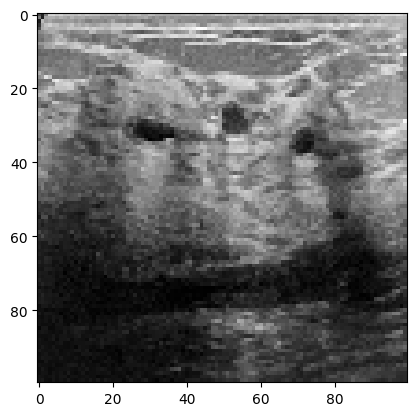

In [59]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 140 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

4. We can show the dataset with random. Using random library to show the figure

<Figure size 640x480 with 0 Axes>

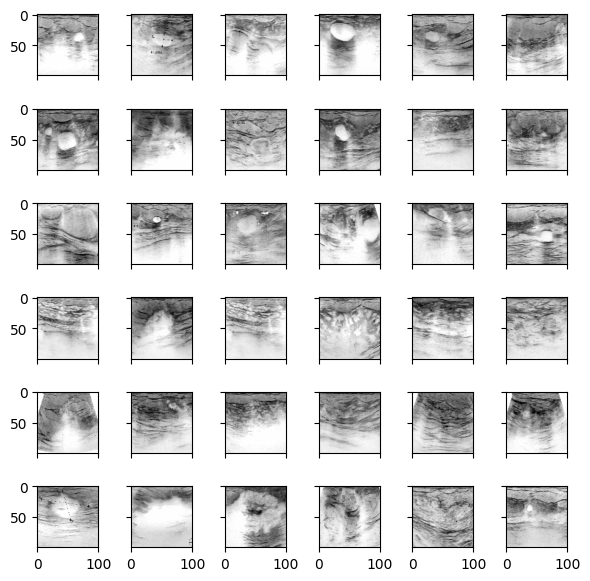

In [60]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS,
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True)

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (100,100))
    ax.imshow(plottable_image, cmap='gray_r')

    ax.set_xbound([0,100])

plt.tight_layout()
plt.show()

5. Split the data and input the parameter of CNN algorithm before make a model (train the data)

The parameters are :

    ● Batch size : 128
    
    ● Epoch : 12 epoch
    
    ● Number of classes = 10 class
    
    ● Picture size : 28x28
    
    ● Data type of training and testing : floating number
    
    ● Activated function : ReLu
    
    ● Model compiling optimizer : ADAM optimizer

In [63]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras. layers import Dense, Dropout, Flatten 
from tensorflow. keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions 
img_rows, img_cols = 100, 100
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train. shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize the data
x_train /= 255
x_test /= 255
print ('x_train shape:', x_train.shape)
print ("Training samples: {}".format(x_train.shape[0]))
print ("Test samples: {}". format(x_test.shape[0]))

x_train shape: (1037, 100, 100, 1)
Training samples: 1037
Test samples: 260


In [64]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#ULTRASOUND MODELLING DATA

In [65]:
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test_encoded, num_classes)
model = Sequential()
model.add(Conv2D (32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(Conv2D (64, (3, 3), activation='relu'))
model.add(MaxPooling2D (pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

6. Training the CNN – DIGITS datasets. This can take awhile

In [18]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}", elapsed_time)

Epoch 1/12
9/9 - 15s - loss: 1.9512 - accuracy: 0.3423 - val_loss: 1.2447 - val_accuracy: 0.4462 - 15s/epoch - 2s/step
Epoch 2/12
9/9 - 10s - loss: 1.1657 - accuracy: 0.4282 - val_loss: 1.0154 - val_accuracy: 0.4615 - 10s/epoch - 1s/step
Epoch 3/12
9/9 - 9s - loss: 0.9732 - accuracy: 0.5583 - val_loss: 0.8977 - val_accuracy: 0.5769 - 9s/epoch - 1s/step
Epoch 4/12
9/9 - 9s - loss: 0.7772 - accuracy: 0.6770 - val_loss: 0.7448 - val_accuracy: 0.6962 - 9s/epoch - 1s/step
Epoch 5/12
9/9 - 10s - loss: 0.6448 - accuracy: 0.7570 - val_loss: 0.6194 - val_accuracy: 0.7577 - 10s/epoch - 1s/step
Epoch 6/12
9/9 - 15s - loss: 0.4739 - accuracy: 0.8312 - val_loss: 0.5189 - val_accuracy: 0.8077 - 15s/epoch - 2s/step
Epoch 7/12
9/9 - 11s - loss: 0.3732 - accuracy: 0.8602 - val_loss: 0.4582 - val_accuracy: 0.8308 - 11s/epoch - 1s/step
Epoch 8/12
9/9 - 9s - loss: 0.2284 - accuracy: 0.9229 - val_loss: 0.4078 - val_accuracy: 0.8577 - 9s/epoch - 1s/step
Epoch 9/12
9/9 - 9s - loss: 0.1849 - accuracy: 0.9605 

7. Evaluate accuracy from DIGITS dataset

In [19]:
# Set the desired TensorFlow output level
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.3479174077510834
Test accuracy: 0.892307698726654


In [20]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 0s 47ms/step
Accuracy: 0.8787878787878788


# CROSS VALIDATION 
# Using K-Fold Cross Validation

In [66]:
from sklearn.model_selection import train_test_split, KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cvscores = []

In [67]:
for train_index, val_index in kf.split(x_train):
    x_fold_train, x_fold_val = x_train[train_index], x_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]


    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    model.fit(x_fold_train, y_fold_train,
              batch_size=128,
              epochs=12,
              verbose=1,
              validation_data=(x_fold_val, y_fold_val),
              callbacks=[early_stopping])

    scores = model.evaluate(x_fold_val, y_fold_val, verbose=0)
    print(f"Fold accuracy: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

print(f"Mean accuracy: {np.mean(cvscores)}%")
print(f"Standard deviation: {np.std(cvscores)}%")

Epoch 1/12
7/7 [==============================] - 13s 2s/step - loss: 3.1809 - accuracy: 0.2967 - val_loss: 1.1356 - val_accuracy: 0.4375
Epoch 2/12
7/7 [==============================] - 8s 1s/step - loss: 1.2614 - accuracy: 0.4029 - val_loss: 1.1261 - val_accuracy: 0.3510
Epoch 3/12
7/7 [==============================] - 7s 1s/step - loss: 1.0857 - accuracy: 0.4331 - val_loss: 0.9635 - val_accuracy: 0.5481
Epoch 4/12
7/7 [==============================] - 7s 1s/step - loss: 1.0143 - accuracy: 0.5223 - val_loss: 0.8988 - val_accuracy: 0.5817
Epoch 5/12
7/7 [==============================] - 7s 1s/step - loss: 0.8384 - accuracy: 0.6357 - val_loss: 0.8236 - val_accuracy: 0.6683
Epoch 6/12
7/7 [==============================] - 7s 1s/step - loss: 0.7859 - accuracy: 0.6502 - val_loss: 0.7657 - val_accuracy: 0.7067
Epoch 7/12
7/7 [==============================] - 7s 1s/step - loss: 0.6548 - accuracy: 0.7358 - val_loss: 0.6667 - val_accuracy: 0.7452
Epoch 8/12
7/7 [========================

# NEW QUERY

In [83]:
# Save the model
model.save("UltraSound_CNN.h5")

In [85]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("UltraSound_CNN.h5")
model

In [87]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Direktori yang berisi new benign images
new_benign_images = 'C:/Users/Hp/MACHINE LEARNING/Lab/ML PROJECT/DATA FOR NEW QUERY/Benign'

# Fungsi untuk memproses dan memprediksi new benign images
def predict_images_in_directory(model, directory):
    predictions = []
    images = []
    image_paths = []

    for filename in os.listdir(directory):
        # Membuat path lengkap ke file gambar
        file_path = os.path.join(directory, filename)

        # Membaca gambar baru
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

        # Pengecekan apakah gambar berhasil dibaca
        if image is None:
            print(f"Error: Gagal membaca gambar dari {file_path}")
            continue

        # Resize gambar sesuai dengan ukuran yang digunakan saat melatih model
        image_resized = cv2.resize(image, (100, 100))

        # Reshape gambar ke format yang sesuai
        image_reshaped = image_resized.reshape(1, 100, 100, 1)

        # Normalisasi data jika diperlukan
        image_normalized = image_reshaped / 255.0

        # Melakukan prediksi menggunakan model yang dimuat
        prediction = model.predict(image_normalized)

        # Menyimpan hasil prediksi dan gambar
        predictions.append(prediction[0])
        images.append(image_resized)
        image_paths.append(file_path)

    return images, predictions, image_paths

# Melakukan prediksi untuk semua gambar dalam direktori
images, predictions, image_paths = predict_images_in_directory(model, new_benign_images)

1/1 [==============================] - 0s 31ms/step


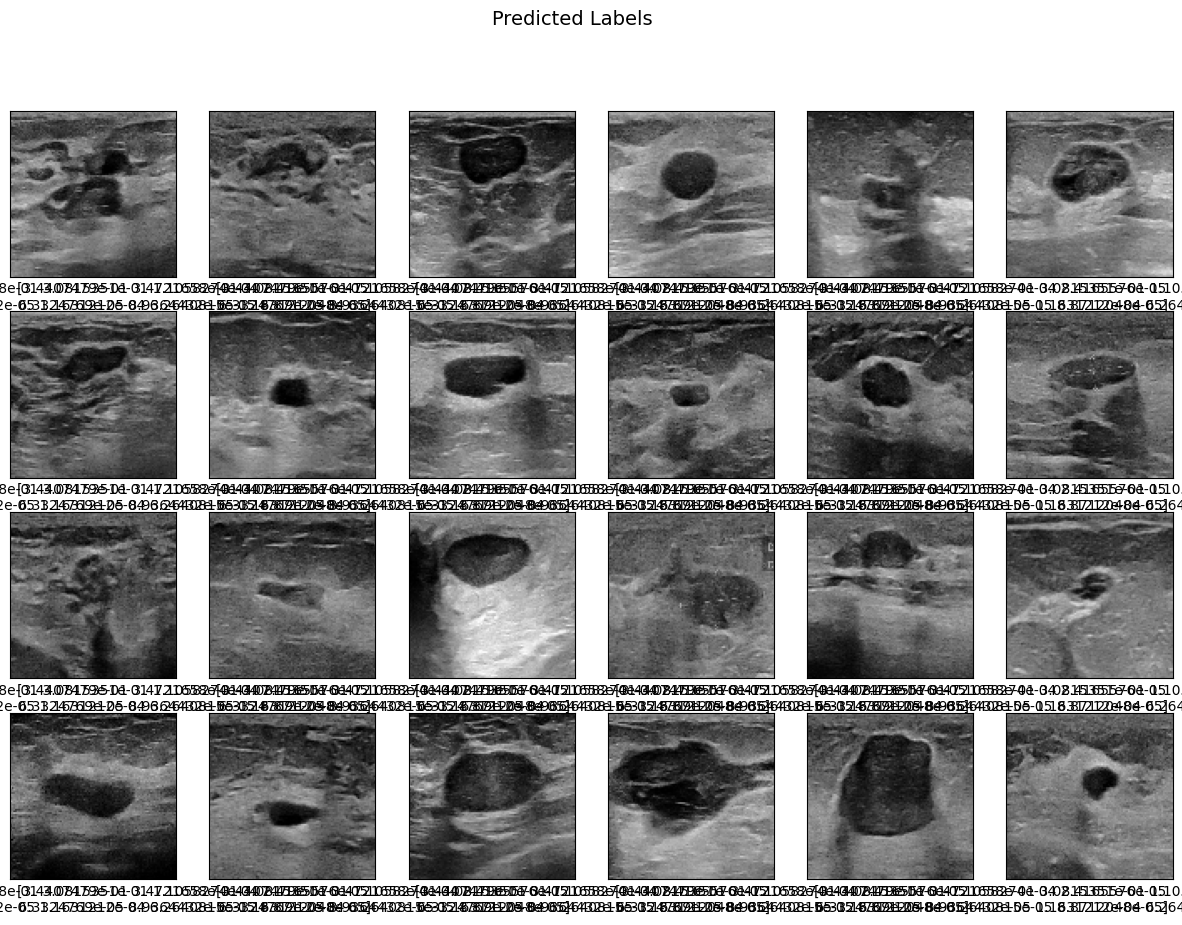

In [97]:
# Visualize the predicted images
fig, ax = plt.subplots(4, 6, figsize=(15, 10))

for i, axi in enumerate(ax.flat):
    if i < len(images):
        axi.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        axi.set(xticks=[], yticks=[])
        axi.set_xlabel(f'{predictions[i]}', color='black')
    else:
        axi.axis('off')

fig.suptitle('Predicted Labels', size=14)
plt.show()

# Parameter Combination

In [68]:
import numpy as np

X = np.array(all_images)
y = np.array(all_labels)

In [69]:
import pandas as pd

pd.Series(y).value_counts()

malignant    461
benign       437
normal       399
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [71]:
# Remove the channel dimension from x_train and x_test
x_train = x_train[:, :, :, 0]  # Select only the first channel (or any other channel)
x_test = x_test[:, :, :, 0]    # Select only the first channel (or any other channel)

In [72]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K
batch_size = 64  # Ubah batch size menjadi 64
num_classes = 10
epochs = 15  # Ubah jumlah epoch menjadi 15
# input image dimensions 
img_rows, img_cols = 100, 100
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train. shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize the data
x_train /= 255
x_test /= 255
print ('x_train shape:', x_train.shape)
print ("Training samples: {}".format(x_train.shape[0]))
print ("Test samples: {}". format(x_test.shape[0]))

x_train shape: (1037, 100, 100, 1)
Training samples: 1037
Test samples: 260


In [73]:
from sklearn.preprocessing import LabelEncoder
# Encode class labels into integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [74]:
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test_encoded, num_classes)
model = Sequential()
model.add(Conv2D (32, kernel_size=(3, 3),
                  activation='sigmoid',  # Mengganti aktivasi menjadi Sigmoid
                  input_shape=input_shape))
model.add(Conv2D (64, (3, 3), activation='sigmoid'))  # Mengganti aktivasi menjadi Sigmoid
model.add(MaxPooling2D (pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))  # Mengganti aktivasi menjadi Sigmoid
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [75]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}", elapsed_time)

Epoch 1/15
17/17 - 17s - loss: 1.7710 - accuracy: 0.3105 - val_loss: 1.2257 - val_accuracy: 0.3385 - 17s/epoch - 1s/step
Epoch 2/15
17/17 - 10s - loss: 1.4000 - accuracy: 0.3317 - val_loss: 1.1143 - val_accuracy: 0.3692 - 10s/epoch - 602ms/step
Epoch 3/15
17/17 - 10s - loss: 1.3774 - accuracy: 0.2999 - val_loss: 1.1159 - val_accuracy: 0.2923 - 10s/epoch - 588ms/step
Epoch 4/15
17/17 - 10s - loss: 1.3195 - accuracy: 0.3433 - val_loss: 1.1043 - val_accuracy: 0.3692 - 10s/epoch - 612ms/step
Epoch 5/15
17/17 - 10s - loss: 1.2878 - accuracy: 0.3356 - val_loss: 1.1020 - val_accuracy: 0.3692 - 10s/epoch - 581ms/step
Epoch 6/15
17/17 - 16s - loss: 1.3156 - accuracy: 0.3240 - val_loss: 1.1013 - val_accuracy: 0.3692 - 16s/epoch - 937ms/step
Epoch 7/15
17/17 - 17s - loss: 1.2930 - accuracy: 0.3269 - val_loss: 1.1021 - val_accuracy: 0.3385 - 17s/epoch - 1s/step
Epoch 8/15
17/17 - 11s - loss: 1.2751 - accuracy: 0.3288 - val_loss: 1.0984 - val_accuracy: 0.3692 - 11s/epoch - 632ms/step
Epoch 9/15
17/

In [76]:
# Set the desired TensorFlow output level
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 1.097339153289795
Test accuracy: 0.3384615480899811


In [77]:
from sklearn import metrics

small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

4/4 [==============================] - 1s 75ms/step
Accuracy: 0.32323232323232326


# K-Fold Cross Validation

In [78]:
from sklearn.model_selection import train_test_split, KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cvscores = []

In [79]:
for train_index, val_index in kf.split(x_train):
    x_fold_train, x_fold_val = x_train[train_index], x_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]


    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    model.fit(x_fold_train, y_fold_train,
              batch_size=128,
              epochs=12,
              verbose=1,
              validation_data=(x_fold_val, y_fold_val),
              callbacks=[early_stopping])

    scores = model.evaluate(x_fold_val, y_fold_val, verbose=0)
    print(f"Fold accuracy: {scores[1]*100}%")
    cvscores.append(scores[1] * 100)

print(f"Mean accuracy: {np.mean(cvscores)}%")
print(f"Standard deviation: {np.std(cvscores)}%")

Epoch 1/12
7/7 [==============================] - 12s 1s/step - loss: 1.1677 - accuracy: 0.3293 - val_loss: 1.1018 - val_accuracy: 0.3413
Epoch 2/12
7/7 [==============================] - 8s 1s/step - loss: 1.1732 - accuracy: 0.3474 - val_loss: 1.1035 - val_accuracy: 0.3413
Epoch 3/12
7/7 [==============================] - 8s 1s/step - loss: 1.1892 - accuracy: 0.3474 - val_loss: 1.1020 - val_accuracy: 0.3413
Epoch 4/12
7/7 [==============================] - 9s 1s/step - loss: 1.1734 - accuracy: 0.3257 - val_loss: 1.0995 - val_accuracy: 0.3413
Epoch 5/12
7/7 [==============================] - 15s 2s/step - loss: 1.1887 - accuracy: 0.3112 - val_loss: 1.0990 - val_accuracy: 0.3413
Epoch 6/12
7/7 [==============================] - 11s 2s/step - loss: 1.1709 - accuracy: 0.3498 - val_loss: 1.0989 - val_accuracy: 0.3413
Epoch 7/12
7/7 [==============================] - 9s 1s/step - loss: 1.1458 - accuracy: 0.3631 - val_loss: 1.0985 - val_accuracy: 0.3413
Epoch 8/12
7/7 [======================